### MNIST

In [1]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [2]:

X, y = mnist['data'], mnist['target']
X.shape
y.shape

(70000,)

5.0

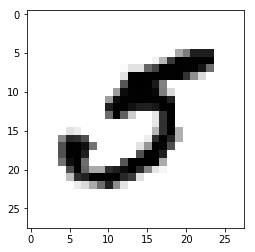

In [3]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

idx = 36000
some_digit, some_target = X[idx], y[idx]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
          interpolation='nearest')
#plt.axis('off')

some_target

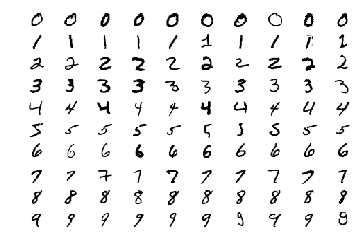

In [4]:
import numpy as np 

samples = [X[y==x][:10] for x in range(10) ]
samples = np.array(samples).flatten().reshape(100,28,28)

for pos in range(100):
        plt.subplot(10, 10, pos+1)
        plt.imshow(samples[pos], cmap=matplotlib.cm.binary)
        plt.axis('off')

In [5]:
plt.show()

In [6]:
n = 60000
X_train, X_test, y_train, y_test = X[:n], X[n:], y[:n], y[n:]

import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

#### Training a Binary Classifier

In [7]:


y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

from sklearn.model_selection import cross_val_score, cross_val_predict

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
#Just like the cross_val_score() function, cross_val_predict() performs K-fold
#cross-validation, but instead of returning the evaluation scores, it returns the predictions
#made on each test fold. This

In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

#2018年1月14日 21:30:18

array([[52530,  2049],
       [ 1044,  4377]])

In [9]:
# use the decision_function() and manually set the threshold

y_scores = sgd_clf.decision_function([some_digit])
y_scores

for threshold in [100000, 120000]:
    print('when threshold is ',threshold, y_scores > threshold)

when threshold is  100000 [False]
when threshold is  120000 [False]


(0, 1)

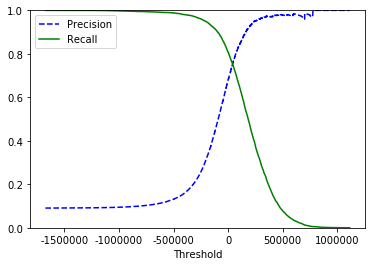

In [10]:
#method : string, optional, default: ‘predict’
#Invokes the passed method name of the passed estimator. For method=’predict_proba’, the columns correspond to the classes in sorted order.

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0, 1])

#### receiver iperating characteristic (ROC) curve

Receiver Operating Characteristic,翻译为"接受者操作特性曲线"，够拗口的。曲线是由两个变量的组合，1-specificity和 Sensitivity. 由于1-specificity=FPR，即负正类率。Sensitivity即是真正类率，True positive rate,反映了正类覆盖程度。这个组合以1-specificity对sensitivity,即是以代价(costs)对收益(benefits)。

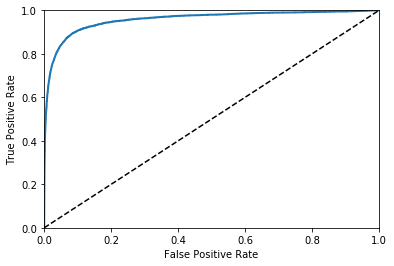

In [11]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)


#### Multiclass Classification

In [12]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([ 5.])

In [13]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores
#sgd_clf.classes_

array([[ -83797.50391687, -395574.93713102, -314231.58980493,
        -157059.71162867, -379201.18103023,   98989.76390308,
        -865624.19676126, -174902.44580946, -618135.40298169,
        -547498.24609112]])

In [14]:
# OneVsOneClassifier

from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
print(ovo_clf.predict([some_digit]))
print(len(ovo_clf.estimators_))   # N * (N-1) / 2 = 10 * 9 /2 = 45

[ 5.]
45


In [15]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([ 0.84513097,  0.85724286,  0.87488123])

In [16]:
#将输入数据标准化后，效果提升明显

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([ 0.90906819,  0.90699535,  0.91318698])

In [17]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5745,    3,   19,   13,   13,   38,   46,    8,   36,    2],
       [   1, 6481,   44,   27,    6,   34,    8,    8,  119,   14],
       [  58,   37, 5330,  102,   86,   26,   92,   55,  156,   16],
       [  48,   42,  136, 5351,    3,  225,   39,   58,  132,   97],
       [  18,   30,   34,    8, 5374,    9,   52,   29,   80,  208],
       [  70,   41,   36,  188,   67, 4596,  117,   24,  179,  103],
       [  35,   24,   45,    2,   48,   86, 5622,    8,   48,    0],
       [  22,   22,   67,   28,   54,   12,    6, 5800,   15,  239],
       [  49,  152,   72,  167,   15,  158,   53,   23, 5009,  153],
       [  45,   35,   26,   85,  166,   38,    2,  202,   73, 5277]])

(-0.5, 9.5, 9.5, -0.5)

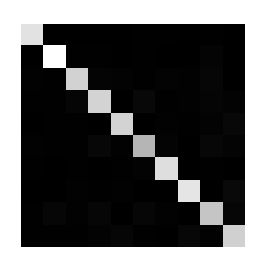

In [18]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.axis('off')

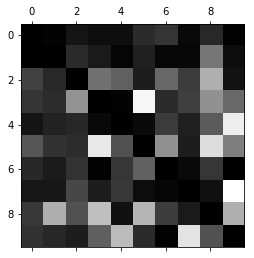

In [19]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

### EX 1 : MNIST with KNeighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()

param_dict = [{'n_neighbors':[3,5,7],
              'weights':['uniform', 'distance']}]

gc = GridSearchCV(knn_clf, param_dict, cv=3)
gc.fit(X_train_scaled , y_train)

In [22]:
gc.best_params_
#gc.best_estimator_

{'n_neighbors': 3, 'weights': 'distance'}